In [288]:
'''
                    POLITECNICO TORINO  
    AUTORE DEL CODICE SALVATORE BERZZA STAGE LOGISTICA AOTOMATICA 
                   

'''

'\n                    POLITECNICO TORINO  \n    AUTORE DEL CODICE SALVATORE BERZZA STAGE LOGISTICA AOTOMATICA \n\n\n'

In [289]:
import random
import math
import psutil as ps
import pandas as pd
import random 
import matplotlib as plt
import matplotlib.pyplot as plt


temperatura=ps.sensors_temperatures()
# Lista vuota per salvare i dati
dati_training = []
dato=[]
for te , item in temperatura.items():
    for dati in item:
        dato.append({
            "sensore": te,
            "etichetta": dati.label or "N/A",
            "corrente (°C)": dati.current,
            "massima (°C)": dati.high,
            "critica (°C)": dati.critical
        })
pf=pd.DataFrame(dato)
#pf.columns
temp_corrente = pf['corrente (°C)']
temp_massima = pf['massima (°C)']
temp_critica = pf['critica (°C)']
dati_rete = []

for tempC in temp_corrente:
    dati_rete.append(tempC)

for tempMax in temp_massima:
    dati_rete.append(tempMax)

for tempCritical in temp_critica:
    dati_rete.append(tempCritical)

dati_normalizzati = [d / 100 for d in dati_rete]
x = dati_normalizzati

H1 = []
B1 = []

#pesi = random.uniform(0, 0.1)
#bias = random.uniform(0, 0.1)
H1 = [random.uniform(0, 0.1) for _ in range(neuroni)]
B1 = [random.uniform(0, 0.2) for _ in range(neuroni)]

B_out = 0.2
W_out = 0.3
target = 1
rate = 0.0001

def relu(x):
    return max(0, x)

def relu_derivative(x):
    return 1 if x > 0 else 0




neuroni = 2
epoche = 100

for i in range(epoche):
    for j in range(neuroni):
        pesi = random.uniform(0, 0.1)
        bias = random.uniform(0, 0.2)
        H1.append(pesi)
        B1.append(bias)

        for dati in x:
            z1 = H1[j] * dati + B1[j]
            a1 = relu(z1)
            out = W_out * a1 + B_out


            
            errore = 0.5 * (target - out) ** 2
            delta_out = (target - out)

          
            
            delta_h = delta_out * W_out * relu_derivative(z1)
            
            W_out = W_out - rate * delta_out * a1
            H1[j] = H1[j] - rate * delta_h * dati
            B1[j] = B1[j] - rate * delta_h
            B_out = B_out - rate * delta_out
           
        
 # Salvo i valori nel dizionario
            dati_training.append({
                'Epoca': i + 1,
                'Neurone': j + 1,
                'Errore': errore,
                'Output': out
            })

# Creo DataFrame pandas
df = pd.DataFrame(dati_training)

  # Stampo le prime righe per verificare
                 
           
        
      
        
        
    
        

In [290]:
 print(f"Epoca {i+1}, Neurone {j+1}, Errore: {errore:.6f} , Out:{out}")
      

Epoca 100, Neurone 2, Errore: 0.435721 , Out:0.06648889804400146


In [291]:
#output_denormalizzati = [val * 100 for val in df['Output']]
df['Output_denormalizzati'] = df['Output'] * 100
#print(df.head())

In [292]:
df

,Epoca,Neurone,Errore,Output,Output_denormalizzati
0,1,1,0.276528,0.256323,25.632295
1,1,1,0.276981,0.255714,25.571353
2,1,1,0.276655,0.256152,25.615154
3,1,1,0.274854,0.258577,25.857727
4,1,1,0.274919,0.258489,25.848934
...,...,...,...,...,...
1795,100,2,0.435177,0.067072,6.707231
1796,100,2,0.435276,0.066967,6.696659
1797,100,2,0.435523,0.066702,6.670162
1798,100,2,0.435622,0.066595,6.659526


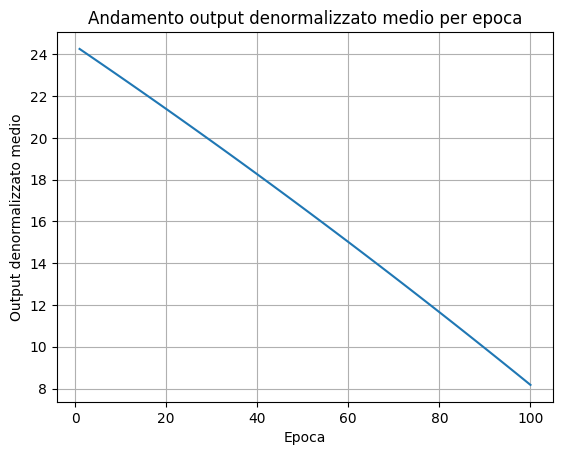

In [293]:
import matplotlib.pyplot as plt

output_denorm_medio = df.groupby('Epoca')['Output_denormalizzati'].mean()

plt.plot(output_denorm_medio.index, output_denorm_medio.values)
plt.xlabel('Epoca')
plt.ylabel('Output denormalizzato medio')
plt.title('Andamento output denormalizzato medio per epoca')
plt.grid(True)
plt.show()

   

In [294]:
'''
    Panoramica generale

Il codice:

Legge le temperature del sistema (CPU, sensori, ecc.) usando psutil

Prepara una lista di dati di temperatura normalizzati

Definisce una piccola rete neurale con 2 neuroni (con funzione di attivazione ReLU)

Allena la rete per 100 epoche, aggiornando pesi e bias con la discesa del gradiente

Salva in un DataFrame pandas i dati di allenamento (errore, output) per ogni epoca e neurone
'''

'\n    Panoramica generale\n\nIl codice:\n\nLegge le temperature del sistema (CPU, sensori, ecc.) usando psutil\n\nPrepara una lista di dati di temperatura normalizzati\n\nDefinisce una piccola rete neurale con 2 neuroni (con funzione di attivazione ReLU)\n\nAllena la rete per 100 epoche, aggiornando pesi e bias con la discesa del gradiente\n\nSalva in un DataFrame pandas i dati di allenamento (errore, output) per ogni epoca e neurone\n'

In [295]:
'''
Riassunto e suggerimenti

Il codice è una semplice rete neurale a 1 layer nascosto con 2 neuroni e un neurone di output

Usa ReLU come attivazione

Fa un training supervisionato con target=1, aggiornando i pesi con la discesa del gradiente

Prende dati di temperatura dal sistema come input

Nota importante: nel ciclo stai aggiungendo continuamente nuovi pesi con append, sarebbe meglio inizializzarli una volta e poi aggiornarli, altrimenti la rete si comporta in modo incoerente
'''

'\nRiassunto e suggerimenti\n\nIl codice è una semplice rete neurale a 1 layer nascosto con 2 neuroni e un neurone di output\n\nUsa ReLU come attivazione\n\nFa un training supervisionato con target=1, aggiornando i pesi con la discesa del gradiente\n\nPrende dati di temperatura dal sistema come input\n\nNota importante: nel ciclo stai aggiungendo continuamente nuovi pesi con append, sarebbe meglio inizializzarli una volta e poi aggiornarli, altrimenti la rete si comporta in modo incoerente\n'

In [296]:
'''
Autore: Brezza Salvatore
Ruolo: stagista presso il Politecnico di Torino
Contesto: Progetto di stage con applicazione pratica sulle temperature del sistema utilizzando una rete neurale scritta interamente a mano, senza l’uso di librerie specifiche per il machine learning.

Descrizione

Il codice sviluppato ha come obiettivo la raccolta e l’analisi delle temperature di vari sensori hardware del computer tramite la libreria psutil. I dati vengono normalizzati e usati come input per una rete neurale artificiale semplice, implementata da zero, con due neuroni nel layer nascosto e un neurone di output.

La rete neurale utilizza la funzione di attivazione ReLU e viene addestrata con la tecnica di discesa del gradiente per minimizzare l’errore quadratico rispetto a un target prefissato.
Durante il processo di addestramento, i pesi e i bias dei neuroni vengono aggiornati manualmente ad ogni iterazione, senza l’ausilio di librerie esterne di machine learning come TensorFlow o PyTorch.

Caratteristiche principali

Raccolta dati: Utilizzo della libreria psutil per monitorare le temperature correnti, massime e critiche dei sensori hardware.

Preprocessing: Normalizzazione dei dati di temperatura per facilitarne l’elaborazione da parte della rete.

Implementazione rete neurale:

2 neuroni nel layer nascosto, funzione di attivazione ReLU.

1 neurone di output con peso e bias propri.

Funzione di costo basata sull’errore quadratico medio (MSE).

Aggiornamento dei pesi e bias tramite backpropagation e discesa del gradiente.

Addestramento: 100 epoche, con salvataggio di errore e output per ogni epoca e neurone in un DataFrame Pandas.
'''

'\nAutore: Brezza Salvatore\nRuolo: stagista presso il Politecnico di Torino\nContesto: Progetto di stage con applicazione pratica sulle temperature del sistema utilizzando una rete neurale scritta interamente a mano, senza l’uso di librerie specifiche per il machine learning.\n\nDescrizione\n\nIl codice sviluppato ha come obiettivo la raccolta e l’analisi delle temperature di vari sensori hardware del computer tramite la libreria psutil. I dati vengono normalizzati e usati come input per una rete neurale artificiale semplice, implementata da zero, con due neuroni nel layer nascosto e un neurone di output.\n\nLa rete neurale utilizza la funzione di attivazione ReLU e viene addestrata con la tecnica di discesa del gradiente per minimizzare l’errore quadratico rispetto a un target prefissato.\nDurante il processo di addestramento, i pesi e i bias dei neuroni vengono aggiornati manualmente ad ogni iterazione, senza l’ausilio di librerie esterne di machine learning come TensorFlow o PyTorc

In [297]:
'''
 Considerazioni

Il progetto dimostra la capacità di costruire una rete neurale da zero e di applicarla a dati reali provenienti dal sistema, senza dipendere da librerie preconfezionate.
Questa esperienza pratica consente di comprendere i meccanismi di base delle reti neurali e di avvicinarsi al machine learning in modo concreto.
'''

'\n Considerazioni\n\nIl progetto dimostra la capacità di costruire una rete neurale da zero e di applicarla a dati reali provenienti dal sistema, senza dipendere da librerie preconfezionate.\nQuesta esperienza pratica consente di comprendere i meccanismi di base delle reti neurali e di avvicinarsi al machine learning in modo concreto.\n'

In [298]:
'''
Autore: Brezza Salvatore
Ruolo:stagista presso il Politecnico di Torino
Docente: Prof. Rizzo
Contesto: Progetto di stage e didattico con applicazioni pratiche di machine learning su dati hardware, in particolare temperature della CPU, sviluppato con il supporto e la supervisione del docente.

'''

'\nAutore: Brezza Salvatore\nRuolo:stagista presso il Politecnico di Torino\nDocente: Prof. Rizzo\nContesto: Progetto di stage e didattico con applicazioni pratiche di machine learning su dati hardware, in particolare temperature della CPU, sviluppato con il supporto e la supervisione del docente.\n\n'